<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

### 1. Introduction to dataset


The boston_df dataset presents data about housing prices in Boston (MA) derived from the U.S. Census Service. Each column in the dataset represents a different variable:

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

Each row represents a different town.


In [7]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### 2. Descriptive statistics and visualizations

To properly understand the raw data from the dataset, we first need to compute some descriptive statistics and choose the proper graphical representations to ease readability and interpretation

#### 2.1 Median value of owner-occupied homes

To gain insight about the median value of owner-occupied homes, we will use a box-plot graph. These graphs are very useful to quickly assert the dispersion of a data set and to detect possible skewness or outliers.

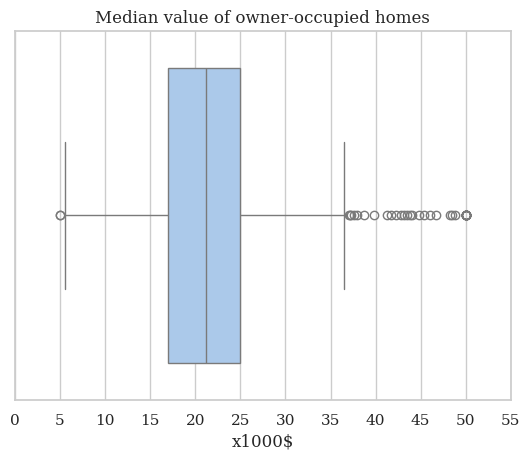

In [90]:
sns.set_theme(style = "whitegrid", palette = "pastel", font = "DejaVu Serif")

ax = sns.boxplot(data = boston_df, x = "MEDV")
ax.set(title = "Median value of owner-occupied homes", xlabel = "x1000$", xticks = range(0,60,5))
pyplot.show()

The graphic shows a symmetric normal distribution of the data (without counting the outliers), with a tight IQR that spans from ~17K dollars to 25K dollars. The first and forth quartile show higher variance, with the first quartile ranging from ~5K dollars to ~17K dollars and the fourth quartile ranging from 25K dollars to ~36K dollars. The graph also shows a considerable number of outliers up of the fourth quartile, impying the presence of several towns were the value of owner-occupied homes is much higher than in the rest.

#### 2.2 Location of the property related to the Charles River

The next barplot describes the situation of the property regarding the Charles river

/lib/python3.12/site-packages/seaborn/axisgrid.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


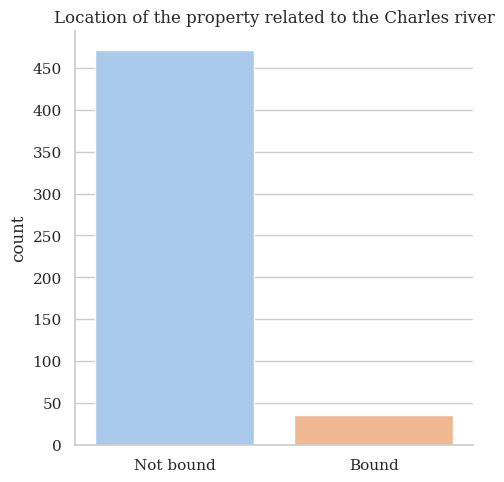

In [142]:
ax = sns.catplot(data = boston_df, x = "CHAS", hue= "CHAS", kind = "count")
ax.set(title = "Location of the property related to the Charles river", yticks = range(0,500,50), 
       xticklabels = ["Not bound", "Bound"], xlabel = "")

ax.legend.remove()


The graph shows that the vast majority of the properties are not bound with the Charles river; only a small fraction (<50) are bound.

#### 2.3 Age vs. value for owner-occupied homes built prior 1940

The next graph shows the distribution of median values of owner-occupied units built prior 1940 classified by age groups:

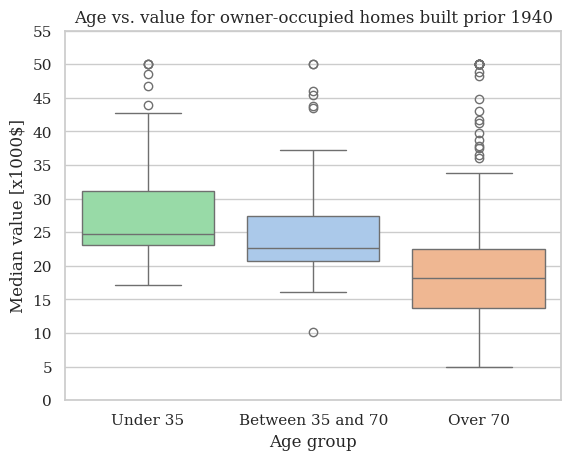

In [162]:
boston_df.loc[boston_df["AGE"] <= 35.0, "AGE_GRP"] = "Under 35"
boston_df.loc[(boston_df["AGE"] > 35.0) & (boston_df["AGE"]< 70.0), "AGE_GRP"] = "Between 35 and 70"
boston_df.loc[boston_df["AGE"] >= 70.0, "AGE_GRP"] = "Over 70"

ax = sns.boxplot(data = boston_df, x = "AGE_GRP", order = ["Under 35", "Between 35 and 70", "Over 70"],
                 y = "MEDV", hue = "AGE_GRP")
ax.set(title = "Age vs. value for owner-occupied homes built prior 1940", xlabel = "Age group", ylabel = "Median value [x1000$]", yticks = range(0,60,5))

pyplot.show()

The graph shows diferent patterns for different age groups:

- Under 35: The median value ranges from ~16K dollars to ~43K dollars. However, the data are noticiably skewed to the left, indicating that the lower half of this group concentrates in values between ~16K dollars and ~24K dollars. There are only a small amount of upper outliers. This means that a majority of young adults posses homes with a value within the lower range of the distribution, which makes sense taking in account that this age group tipycally posses lesser economic means that older people. However, the median value of this group is higher than the IQR of the owners over 70 years old, indicating that people under 35 tend to posses units with a higher value than people over 70. A possible explanation for this could be the need of young adults to own homes that can accomodate children. Another possible explanation could be that childless young adults prefer to live in downtown areas, where there is more social and cultural activity, but where the property prices are higher than in suburban areas, more suited for children and typically cheaper.
  
- Between 35 and 70: The values of this age group place in a similar position as the under 35 group; however, the distribution is tighter, with a max value ~37K dollars vs. ~43K dollars. In this group, the data are also skewed to the left, with the median situated at ~23K dollars. In comparison with the previous group, the 3rd and 4th quartile are tighter here, indicating that this age group tend to leave areas with a higher cost. This could be explained by young families moving to suburban areas, where space is cheaper and security is higher.

- Over 70: The distribution of this age group is mostly symmetrical; the range however is significantly lower than in the previous group. This could be explained by old people moving to smaller, cheaper or more isolated properties when the children grow up and leave the home. However, there is a bigger amount of outliers in the upper range; this could be explained by the revalorization of units that could have been in the outskirts prior to 1940, but that have been included into downtown areas due to the massive urban growth observed during the second half of the 20th century.


#### 2.4 Nitric oxide concentrations vs industrial area proportion

Next, we will evaluate the relationship between nitric oxide concentrations vs industrial area proportion

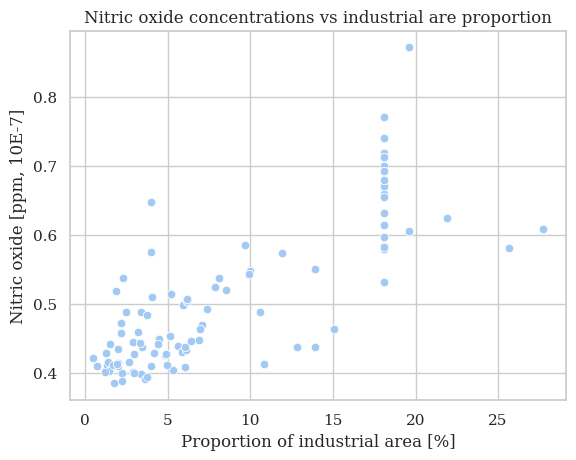

In [231]:
ax = sns.scatterplot(data = boston_df, x = "INDUS", y = "NOX")
ax.set(title = "Nitric oxide concentrations vs industrial are proportion", xlabel = "Proportion of industrial area [%]",
       ylabel = "Nitric oxide [ppm, 10E-7]")

pyplot.show()


There is a clear positive correlation between measured nitric oxide concentrations an the proportion of area destined for industrial activities. Nitric oxide is an important intermediate in the chemical industry, as well as a waste product of combustion systems; therefore, a positive correlation is expected. The data could also indicate defficiencies in industrial waste management; it is important to keep emissions low, since nitric oxide can cause acid rain and ozone depletion.

#### 2.5 Pupil-teacher ratio by town

The next graph is a histogram showing the distribution of pupil to teacher ration;

[Text(0.5, 0, 'Pupil to teacher ratio')]

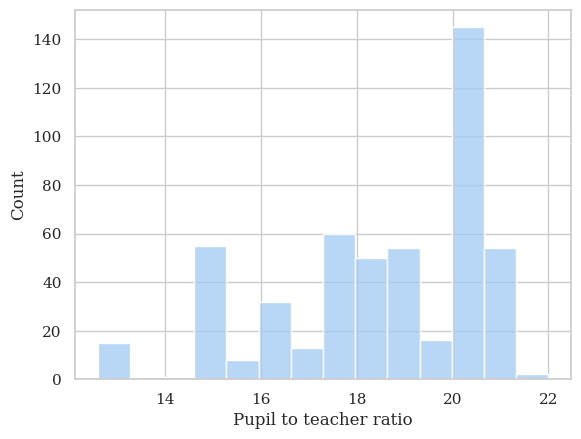

In [175]:
ax = sns.histplot(data = boston_df, x = "PTRATIO")
ax.set(xlabel = "Pupil to teacher ratio")

The data are noticiably skewed to the right, with the majority of towns concentrating around a ratio between 18-22. This could indicate that there is either several towns with fewer children and therefore a lower ratio, or towns with more elitist schools, where there are more teachers per pupil than in more humble areas. 

### 3. Statistical tests

Using several statistical tests we can determine if apparent differences in the values provided by the dataset are statistically significant or not.

#### 3.1 Significant difference in median value of houses bounded by the Charles river (t-test)

A t-test is used to compare the means of two different subpopulations within a dataset. The equality of the variance of both samples is highly important here: if the variances are statistically equal, we will conduct an independent two-sample t-test; if the variances are significally different, we must perform a Welch's t-test. We can determine the equality of the variances using the Lavene's test. With alpha = 0.5:

In [186]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center = "mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The p-value obtained in the Levene test is lower than our alpha value; our variances are significantly different. Now, we will perform the Welch' t-test; the null hypothesis is that there is no significant difference between the mean values of both samples.

In [190]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

The p-value obtained in the Welch's t-test is lower than alpha = 0.5; we reject the null hypothesis that the means are not significantly different and conclude that the means are different from an statisitc point of view.

#### 3.2 Difference in mean values between different age groups (ANOVA)

ANOVA tests are very useful if we need to determine the statistical difference of the mean of 3 or more samples. First we test the differences in the variance of each age group:

In [216]:
under35_medv = boston_df.loc[boston_df["AGE_GRP"] == "Under 35", ["MEDV"]]
between3570_medv = boston_df.loc[boston_df["AGE_GRP"] == "Between 35 and 70", ["MEDV"]]
over70_medv = boston_df.loc[boston_df["AGE_GRP"] == "Over 70", ["MEDV"]]

In [215]:
scipy.stats.levene(under35_medv, between3570_medv, over70_medv, center = "mean")

LeveneResult(statistic=array([2.78062003]), pvalue=array([0.06295337]))

The p-value obtained is higher than alpha = 0.05; we cannot reject the null thesis that the variances are equal. Now, we can proceed with a standard one-way ANOVA test:

In [217]:
f_statistic, p_value = scipy.stats.f_oneway(under35_medv, between3570_medv, over70_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: [36.40764999], P-Value: [1.7105011e-15]


The p-value obtained is much smaller than alpha = 0.05; we can conclude that the value means are significantly different between at least two of the groups.

#### 3.3 Correlation between nitric oxide concentration and proportion of industrial area (Pearson correlation)

The Pearson correlation tests helps us discern if two continuous variables are correlated and gives us a measure of the strength and direction of that correlation with the r correlation coefficient, which can adopt values between -1 (strong negative correlation) and +1 (strong positive correlation). The null hypothesis is that both variables are not correlated. With alpha = 0.5:

In [227]:
scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The p-value obtained is lower than our alpha value; we can conclude that the variables are correlated. The correlation coefficient is also close to 1, which indicates a fairly strong correlation.  We can obtain the correlation value if we perform a linear regression: 

In [229]:
X = boston_df['INDUS']
y = boston_df['NOX']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           7.91e-98
Time:                        20:04:58   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We obtain a correlation value of 0.0129; that means NO concetrations grow in 0.013 pp10m per 1% increment in industrial area.

#### 3.4 Impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes (Regression analysis)

As in the previous analysis, a linear regression helps us determine the coefficient value; this means, the linear relationship between the independent variable x and the dependent variable y. Let's perform the regression



In [225]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        19:56:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We obtain a significant correlation (p-value = 1.21e-08) with a correlation coefficient of 0.248, which indicates mild positive correlation. The correlation value is 1.091; this means that  the median value increases 1091$ per extra weighted distance unit.